# Load Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [3]:
dataObj = datasets.load_iris()

In [7]:
X = pd.DataFrame(dataObj.data, columns = dataObj.feature_names)
X = X.iloc[:, 2:4]
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [9]:
y = dataObj.target
y[:5]

array([0, 0, 0, 0, 0])

# Spliting Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)

In [14]:
print(f"Train size = {y_train.shape[0]}")
print(f"Test size = {y_test.shape[0]}")

Train size = 105
Test size = 45


# Standardized Data

In [15]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [16]:
X_train_t = scale.transform(X_train)
X_test_t = scale.transform(X_test)

# Train Model

In [19]:
model = SVC()
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [35]:
## Hyper parameter setting
kernel = 'linear'
C = .001
random_state = 1
verbose = True

In [36]:
model = SVC(kernel=kernel, C=C, random_state=random_state, verbose=verbose)
model

SVC(C=0.001, kernel='linear', random_state=1, verbose=True)

In [37]:
## fiiting model
model.fit(X_train_t, y_train)

[LibSVM]*
optimization finished, #iter = 35
obj = -0.067260, rho = 0.041805
nSV = 70, nBSV = 70
*
optimization finished, #iter = 35
obj = -0.063325, rho = -0.009885
nSV = 70, nBSV = 70
*
optimization finished, #iter = 35
obj = -0.069126, rho = -0.038592
nSV = 70, nBSV = 70
Total nSV = 105


SVC(C=0.001, kernel='linear', random_state=1, verbose=True)

In [38]:
## predict
y_pred = model.predict(X_test_t)
y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [39]:
## miss classifed
sumMiss = (y_test != y_pred).sum()
print(f'Number of miss classified = {sumMiss}')

Number of miss classified = 1


In [40]:
## classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



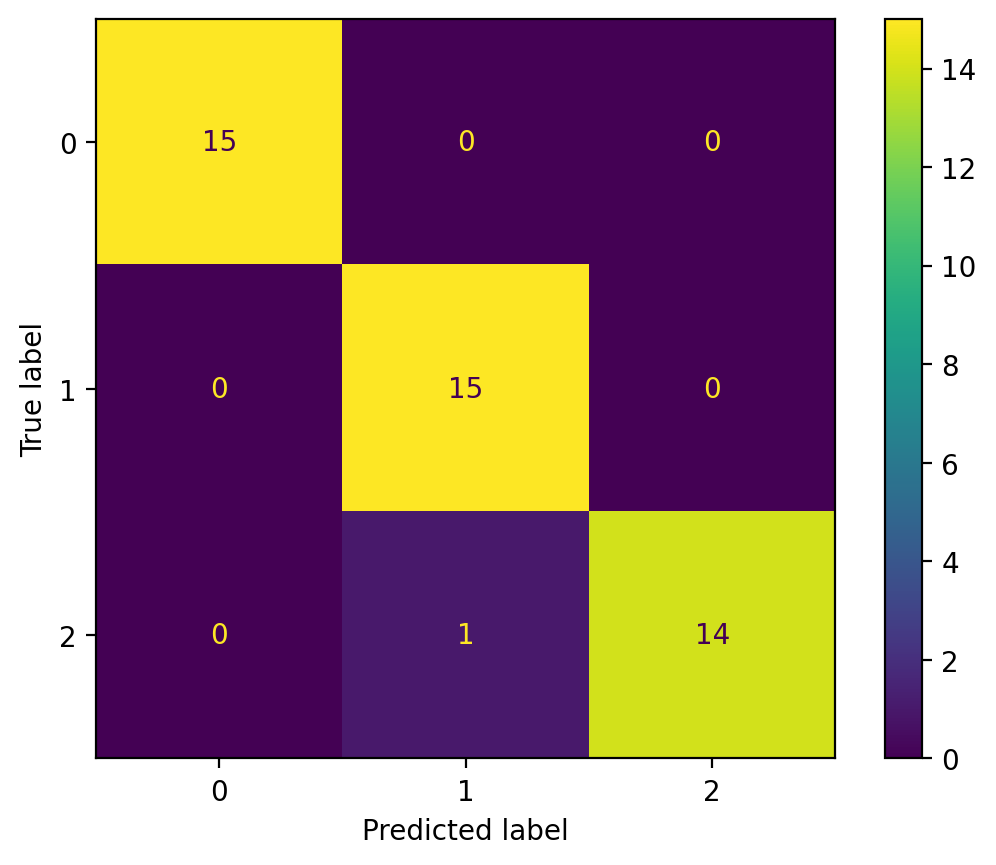

In [41]:
cm = metrics.confusion_matrix(y_test, y_pred)
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot()

In [43]:
c_param = [100, 10, 1, .1, .01, .001]
for c in c_param:
    model = SVC(C=c, kernel='linear', random_state=1)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    print(f'C = {c} \n')
    print(metrics.classification_report(y_test, pred))
    print('--' * 50 + '\n')

C = 100 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

----------------------------------------------------------------------------------------------------

C = 10 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

----------------------------------------------------------------------------------------------------

C = 1 

       